c:\Users\Ian\anaconda3\envs\yolov8\lib\site-packages\transformers\models\oneformer\image_processing_oneformer.py:446: FutureWarning: The `reduce_labels` argument is deprecated and will be removed in v4.27. Please use `do_reduce_labels` instead.
  warnings.warn(
c:\Users\Ian\anaconda3\envs\yolov8\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Text(0.5, 1.0, 'target')

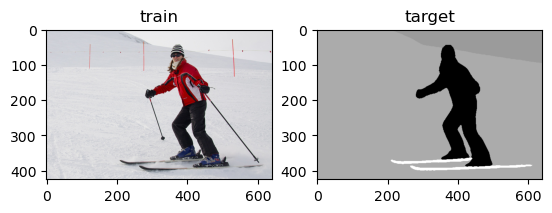

In [46]:
# Example

from transformers import OneFormerProcessor, OneFormerForUniversalSegmentation
from PIL import Image
import requests
image = Image.open("coco.jpeg")

# Loading a single model for all three tasks
processor = OneFormerProcessor.from_pretrained("shi-labs/oneformer_coco_swin_large")
model = OneFormerForUniversalSegmentation.from_pretrained("shi-labs/oneformer_coco_swin_large")

# Semantic Segmentation
semantic_inputs = processor(images=image, task_inputs=["semantic"], return_tensors="pt")
semantic_outputs = model(**semantic_inputs)

import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image
import numpy as np
# pass through image_processor for postprocessing
predicted_semantic_map = processor.post_process_semantic_segmentation(semantic_outputs, target_sizes=[image.size[::-1]])[0]
predicted_semantic_map.size()
predicted_semantic_map = predicted_semantic_map.float()
Predict=to_pil_image(predicted_semantic_map)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('train')
plt.subplot(1,2,2)
plt.imshow(Predict, cmap='gray')
plt.title('target')
